In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

df = pd.read_csv('/kaggle/input/salary-prediction-dataset/Salary_Data.csv')
df.head()

/kaggle/input/salary-prediction-dataset/Salary_Data.csv


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [2]:
df= df.rename(columns={"Education Level":"Education",
                      "Job Title":"Job",
                      "Years of Experience":"Experience"})
df.head()

,Age,Gender,Education,Job,Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
X= df["Experience"].values.astype(float)
y= df["Salary"].values.astype(float)

# Replace NaN with mean
X = np.where(np.isnan(X), np.nanmean(X), X)
y = np.where(np.isnan(y), np.nanmean(y), y)

print(X,'\n',y)


[ 5.  3. 15. ...  4. 14.  1.] 
 [ 90000.  65000. 150000. ...  55000. 140000.  35000.]


In [4]:
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
scaler_y = StandardScaler()

X = X.reshape(-1,1).astype(float) #reshaping to convert from 1D to 2D for applying feature scaling
y = y.reshape(-1,1).astype(float)

X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

X_scaled = X_scaled.flatten() #flattening converts it back from 2D to 1D
y_scaled = y_scaled.flatten() 


In [5]:
w = 0
b = 0
alpha = 0.999  
k = 5000

for i in range(k):
    y_pred = w*X_scaled + b
    error = y_scaled - y_pred

    dw = -(2/len(X_scaled)) * np.sum(error * X_scaled)
    db = -(2/len(X_scaled)) * np.sum(error)

    w = w - alpha * dw
    b = b - alpha * db
    if i % 100 == 0:
        print(f"Loss {i}: ", np.mean(error**2))


print("Scaled model: w =", w, " b =", b)
print("Error:",np.mean(error**2))

Loss 0:  1.0
Loss 100:  0.7840754919151974
Loss 200:  0.6393949268274238
Loss 300:  0.5424514807138564
Loss 400:  0.4774943682041539
Loss 500:  0.43396975014327704
Loss 600:  0.40480600957426277
Loss 700:  0.38526479814336256
Loss 800:  0.37217117788969534
Loss 900:  0.36339777650905497
Loss 1000:  0.3575191447559869
Loss 1100:  0.353580158063273
Loss 1200:  0.3509408336733282
Loss 1300:  0.3491723501066682
Loss 1400:  0.3479873748389588
Loss 1500:  0.3471933802485905
Loss 1600:  0.3466613628920152
Loss 1700:  0.34630488380370544
Loss 1800:  0.34606602441531964
Loss 1900:  0.34590597629667524
Loss 2000:  0.3457987357965019
Loss 2100:  0.3457268791263026
Loss 2200:  0.3456787314484779
Loss 2300:  0.34564647001925364
Loss 2400:  0.3456248531965405
Loss 2500:  0.3456103688095975
Loss 2600:  0.3456006635227525
Loss 2700:  0.3455941604796402
Loss 2800:  0.3455898031051085
Loss 2900:  0.34558688343927196
Loss 3000:  0.34558492711246663
Loss 3100:  0.34558361627253364
Loss 3200:  0.3455827379

In [6]:
print("NaNs in X:", np.isnan(X).any())
print("NaNs in y:", np.isnan(y).any()) #without the .any() it will give result for each row one by one.


NaNs in X: False
NaNs in y: False


In [7]:
new_x = 7  # example years of experience, random input

# SCALE the new input
x_scaled_new = scaler_x.transform([[new_x]])[0][0]
y_pred_scaled = w * x_scaled_new + b
y_real = scaler_y.inverse_transform([[y_pred_scaled]])[0][0]
print("Scaled prediction:", y_pred_scaled)
print("Actual predicted salary:", y_real)


Scaled prediction: -0.14619313440941292
Actual predicted salary: 107613.44116592621


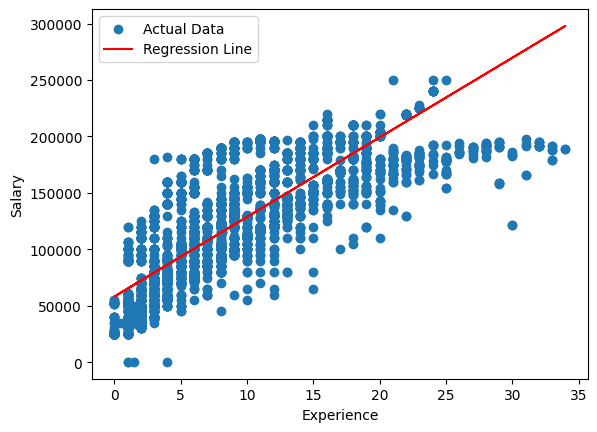

In [8]:
import matplotlib.pyplot as plt
y_pred_scaled = w * X_scaled + b
Y_pred_real = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1))
X=X.flatten()
y=y.flatten()
plt.scatter(X,y,label="Actual Data")
plt.plot(X,Y_pred_real,label = "Regression Line",color='red')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [9]:
y=y.reshape(-1,1)
y

array([[ 90000.],
       [ 65000.],
       [150000.],
       ...,
       [ 55000.],
       [140000.],
       [ 35000.]])

In [10]:
ss_res = np.sum((y - Y_pred_real)**2)
ss_tot = np.sum((y - np.mean(y))**2)
r2 = 1 - (ss_res/ss_tot)
print("R square value from using gradient descent: ",r2)

R square value from using gradient descent:  0.6544190444290175


In [11]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
X = X.reshape(-1, 1)

lin.fit(X, y)

print("Sklearn Results:")
print("Coefficient (w):", lin.coef_[0])
print("Intercept (b):", lin.intercept_)

print("\nGRADIENT DESCENT MODEL:")

# w_real = w_scaled * (std_y / std_x)
w_real = (scaler_y.scale_[0] / scaler_x.scale_[0]) * w

# b_real = mean_y - w_real * mean_x
b_real = scaler_y.mean_[0] - w_real * scaler_x.mean_[0]

print("w_real =", w_real)
print("b_real =", b_real)


Sklearn Results:
Coefficient (w): [7046.64236204]
Intercept (b): [58286.59791176]

GRADIENT DESCENT MODEL:
w_real = 7046.325632427263
b_real = 58289.16173893534
